Archivo 'NLS_2soliton_interaction.mat' creado exitosamente
Dimensiones: x=1000 puntos, t=1000 puntos
Dominio: x ∈ [0.0, 20.0], t ∈ [0.0, 5.0]


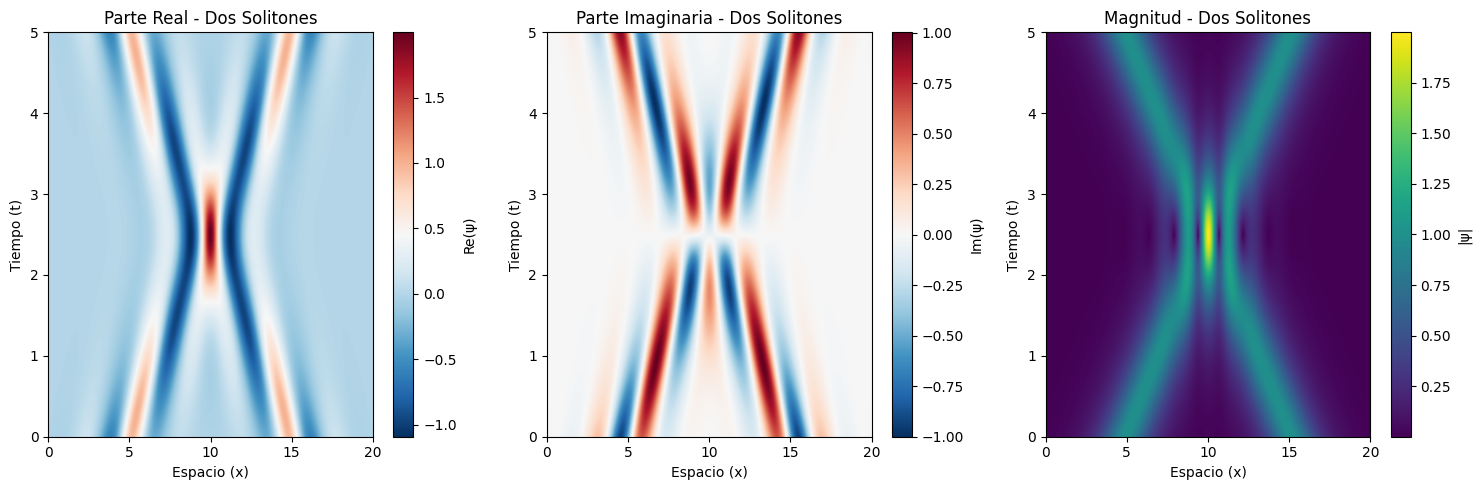

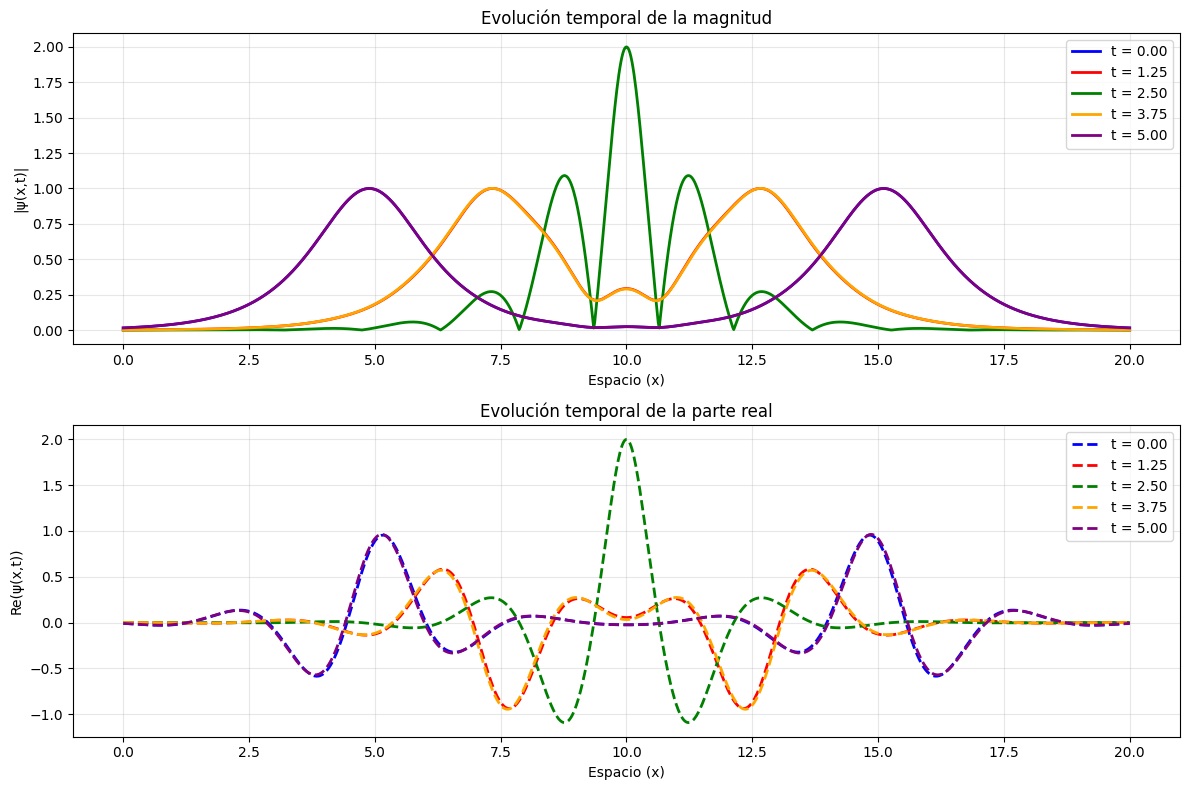

Visualización completada. Archivos guardados:
- NLS_2soliton_interaction.mat
- exact_solution_2soliton_verification.png
- 2soliton_time_slices.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat

#######################################################################
# aqui va la parte teorica de la solucion exacta, me la salto porque no la necesitas

x1 = 5.0
x2 = 15.0

eta1 = 0.5
eta2 = 0.5

kappa1 = -1.0
kappa2 = 1.0

D2 = 1.0
D3 = 0.0

lambda1 = 0.0

chi20 = np.pi


#######################################################################
def ksi1(x, t):
    return (
        2 * (x - x1) * eta1
        + 4 * eta1 * (D2 * kappa1 + 2 * D3 * (3 * kappa1**2 - eta1**2)) * t
        + 2 * eta1 * lambda1 * (D2 + 12 * D3 * kappa1) * t**2
        + 8 * D3 * eta1 * lambda1**2 * t**3
    )

def ksi2(x, t):
    return (
        2 * (x - x2) * eta2
        + 4 * eta2 * (D2 * kappa2 + 2 * D3 * (3 * kappa2**2 - eta2**2)) * t
        + 2 * eta2 * lambda1 * (D2 + 12 * D3 * kappa2) * t**2
        + 8 * D3 * eta2 * lambda1**2 * t**3
    )

#######################################################################
def chi1(x, t):
    return (
        2 * (x - x1) * (kappa1 + lambda1 * t)
        + 2 * (D2 * (kappa1**2 - eta1**2) + 4 * D3 * kappa1 * (kappa1**2 - 3 * eta1**2)) * t
        + 2 * lambda1 * (D2 * kappa1 + 6 * D3 * (kappa1**2 - eta1**2)) * t**2
        + lambda1**2 * (2/3 * D2 + 8 * D3 * kappa1) * t**3
        + 2 * D3 * lambda1**3 * t**4
    )

def chi2(x, t):
    return (
        2 * (x - x2) * (kappa2 + lambda1 * t)
        + 2 * (D2 * (kappa2**2 - eta2**2) + 4 * D3 * kappa2 * (kappa2**2 - 3 * eta2**2)) * t
        + 2 * lambda1 * (D2 * kappa2 + 6 * D3 * (kappa2**2 - eta2**2)) * t**2
        + lambda1**2 * (2/3 * D2 + 8 * D3 * kappa2) * t**3
        + 2 * D3 * lambda1**3 * t**4
    )

#######################################################################
def N(x, t):
    term1 = eta1 * np.cosh(ksi2(x, t)) * np.exp(-1j * chi1(x, t)) * (
        (kappa2 - kappa1) ** 2 + 2j * eta2 * (kappa2 - kappa1) * np.tanh(ksi2(x, t)) + (eta1 ** 2 - eta2 ** 2)
    )

    term2 = eta2 * np.cosh(ksi1(x, t)) * np.exp(-1j * chi2(x, t)) * (
        (kappa2 - kappa1) ** 2 - 2j * eta1 * (kappa2 - kappa1) * np.tanh(ksi1(x, t)) - (eta1 ** 2 - eta2 ** 2)
    )

    return term1 + term2

#######################################################################
def D(x, t):
    term3 = np.cosh(ksi1(x, t) + ksi2(x, t)) * ((kappa2 - kappa1) ** 2 + (eta2 - eta1) ** 2)
    term4 = np.cosh(ksi1(x, t) - ksi2(x, t)) * ((kappa2 - kappa1) ** 2 + (eta2 + eta1) ** 2)
    term5 = 4 * eta1 * eta2 * np.cos(chi2(x, t) - chi1(x, t))

    return term3 + term4 - term5

#######################################################################
def q(x, t):
    return 4 * (N(x, t) / D(x, t))


# Define values of x and t
t_values = np.linspace(0, 5, 1000)
x_values = np.linspace(0, 20, 1000)

# Crear malla para evaluación
X, T = np.meshgrid(x_values, t_values, indexing='ij')

# Calcular la solución en toda la malla
q_values = np.zeros((len(x_values), len(t_values)), dtype=complex)

for i, x in enumerate(x_values):
    for j, t in enumerate(t_values):
        q_values[i, j] = q(x, t)

# Crear diccionario con los datos
data = {
    'x_values': x_values.reshape(-1, 1),
    't_values': t_values.reshape(-1, 1),
    'q_values': q_values,
    'description': 'Solución exacta de dos solitones interactuando para NLSE de segundo orden',
    'parameters': {
        'x1': x1,
        'x2': x2,
        'eta1': eta1,
        'eta2': eta2,
        'kappa1': kappa1,
        'kappa2': kappa2,
        'D2': D2,
        'D3': D3,
        'lambda1': lambda1,
        'chi20': chi20
    },
    'domain': {
        'x_min': x_values.min(),
        'x_max': x_values.max(),
        't_min': t_values.min(),
        't_max': t_values.max()
    }
}

# Guardar en archivo .mat
filename = 'NLS_2soliton_interaction.mat'
savemat(filename, data)

print(f"Archivo '{filename}' creado exitosamente")
print(f"Dimensiones: x={len(x_values)} puntos, t={len(t_values)} puntos")
print(f"Dominio: x ∈ [{x_values.min()}, {x_values.max()}], t ∈ [{t_values.min()}, {t_values.max()}]")

# Visualizar para verificar
plt.figure(figsize=(15, 5))

# Parte real
plt.subplot(1, 3, 1)
im1 = plt.imshow(np.real(q_values.T), extent=[x_values.min(), x_values.max(), t_values.min(), t_values.max()],
                aspect='auto', origin='lower', cmap='RdBu_r')
plt.colorbar(im1, label='Re(ψ)')
plt.xlabel('Espacio (x)')
plt.ylabel('Tiempo (t)')
plt.title('Parte Real - Dos Solitones')

# Parte imaginaria
plt.subplot(1, 3, 2)
im2 = plt.imshow(np.imag(q_values.T), extent=[x_values.min(), x_values.max(), t_values.min(), t_values.max()],
                aspect='auto', origin='lower', cmap='RdBu_r')
plt.colorbar(im2, label='Im(ψ)')
plt.xlabel('Espacio (x)')
plt.ylabel('Tiempo (t)')
plt.title('Parte Imaginaria - Dos Solitones')

# Magnitud
plt.subplot(1, 3, 3)
im3 = plt.imshow(np.abs(q_values.T), extent=[x_values.min(), x_values.max(), t_values.min(), t_values.max()],
                aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(im3, label='|ψ|')
plt.xlabel('Espacio (x)')
plt.ylabel('Tiempo (t)')
plt.title('Magnitud - Dos Solitones')

plt.tight_layout()
plt.savefig('exact_solution_2soliton_verification.png', dpi=300, bbox_inches='tight')
plt.show()

# También mostrar algunos cortes temporales
plt.figure(figsize=(12, 8))

# Cortes en diferentes tiempos
time_indices = [0, 250, 500, 750, 999]
colors = ['blue', 'red', 'green', 'orange', 'purple']

plt.subplot(2, 1, 1)
for idx, color in zip(time_indices, colors):
    t_val = t_values[idx]
    plt.plot(x_values, np.abs(q_values[:, idx]), color=color,
             label=f't = {t_val:.2f}', linewidth=2)
plt.xlabel('Espacio (x)')
plt.ylabel('|ψ(x,t)|')
plt.title('Evolución temporal de la magnitud')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
for idx, color in zip(time_indices, colors):
    t_val = t_values[idx]
    plt.plot(x_values, np.real(q_values[:, idx]), color=color,
             label=f't = {t_val:.2f}', linewidth=2, linestyle='--')
plt.xlabel('Espacio (x)')
plt.ylabel('Re(ψ(x,t))')
plt.title('Evolución temporal de la parte real')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('2soliton_time_slices.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualización completada. Archivos guardados:")
print("- NLS_2soliton_interaction.mat")
print("- exact_solution_2soliton_verification.png")
print("- 2soliton_time_slices.png")

In [ ]:
%pip install tensorflow==2.16.0
%pip install deepxde

ERROR: Could not find a version that satisfies the requirement tensorflow==2.16.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.16.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 11.3 MB/s eta 0:00:00


In [ ]:
import sys


# Suppress TensorFlow logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Reduces TensorFlow verbosity
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Disable oneDNN optimizations if needed

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

import numpy as np
import matplotlib
matplotlib.use('pdf')
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata
from pyDOE import lhs

import time
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import deepxde as dde
import json


# Set the random seed for NumPy
np.random.seed(1234)
# Set the random seed for TensorFlow
tf.set_random_seed(1234)

# Check GPU availability and print in red
gpu_available = tf.config.list_physical_devices('GPU')
print("\033[91mGPU Available: ", gpu_available, "\033[0m")
time.sleep(2)

############################


class PhysicsInformedNN:
    # Initialize the class
    def __init__(self, x0, u0, v0, tb, X_f, layers, lb, ub, X_u_train):

        X0 = np.concatenate((x0, 0 * x0), 1)  # (x0, 0)
        X_lb = np.concatenate((0 * tb + lb[0], tb), 1)  # (lb[0], tb)
        X_ub = np.concatenate((0 * tb + ub[0], tb), 1)  # (ub[0], tb)

        self.lb = lb
        self.ub = ub
        self.X_u_train = X_u_train

        self.x0 = X0[:, 0:1]
        self.t0 = X0[:, 1:2]

        self.x_lb = X_lb[:, 0:1]
        self.t_lb = X_lb[:, 1:2]

        self.x_ub = X_ub[:, 0:1]
        self.t_ub = X_ub[:, 1:2]

        self.x_f = X_f[:, 0:1]
        self.t_f = X_f[:, 1:2]

        self.u0 = u0
        self.v0 = v0

        # Initialize NNs
        self.layers = layers
        self.weights, self.biases = self.initialize_NN(layers)

        # tf Placeholders
        self.x0_tf = tf.placeholder(tf.float32, shape=[None, self.x0.shape[1]])
        self.t0_tf = tf.placeholder(tf.float32, shape=[None, self.t0.shape[1]])

        self.u0_tf = tf.placeholder(tf.float32, shape=[None, self.u0.shape[1]])
        self.v0_tf = tf.placeholder(tf.float32, shape=[None, self.v0.shape[1]])

        self.x_lb_tf = tf.placeholder(tf.float32, shape=[None, self.x_lb.shape[1]])
        self.t_lb_tf = tf.placeholder(tf.float32, shape=[None, self.t_lb.shape[1]])

        self.x_ub_tf = tf.placeholder(tf.float32, shape=[None, self.x_ub.shape[1]])
        self.t_ub_tf = tf.placeholder(tf.float32, shape=[None, self.t_ub.shape[1]])

        self.x_f_tf = tf.placeholder(tf.float32, shape=[None, self.x_f.shape[1]])
        self.t_f_tf = tf.placeholder(tf.float32, shape=[None, self.t_f.shape[1]])

        # tf Graphs
        self.u0_pred, self.v0_pred, _, _ = self.net_uv(self.x0_tf, self.t0_tf)
        self.u_lb_pred, self.v_lb_pred, self.u_x_lb_pred, self.v_x_lb_pred = self.net_uv(self.x_lb_tf, self.t_lb_tf)
        self.u_ub_pred, self.v_ub_pred, self.u_x_ub_pred, self.v_x_ub_pred = self.net_uv(self.x_ub_tf, self.t_ub_tf)
        self.f_u_pred, self.f_v_pred = self.net_f_uv(self.x_f_tf, self.t_f_tf)

        # Loss
        self.loss = tf.reduce_mean(tf.square(self.u0_tf - self.u0_pred)) + \
                    tf.reduce_mean(tf.square(self.v0_tf - self.v0_pred)) + \
                    tf.reduce_mean(tf.square(self.u_lb_pred - self.u_ub_pred)) + \
                    tf.reduce_mean(tf.square(self.v_lb_pred - self.v_ub_pred)) + \
                    tf.reduce_mean(tf.square(self.u_x_lb_pred - self.u_x_ub_pred)) + \
                    tf.reduce_mean(tf.square(self.v_x_lb_pred - self.v_x_ub_pred)) + \
                    tf.reduce_mean(tf.square(self.f_u_pred)) + \
                    tf.reduce_mean(tf.square(self.f_v_pred))

        # Optimizers using TensorFlow 2.x
        self.optimizer = dde.optimizers.tensorflow_compat_v1.scipy_optimizer.ScipyOptimizerInterface(
            self.loss, method='L-BFGS-B',
            options={'maxiter': 20000, 'maxfun': 20000, 'maxcor': 50, 'maxls': 50, 'ftol': 1.0 * np.finfo(float).eps})

        #########################################################
        self.optimizer_Adam = tf.train.AdamOptimizer()
        self.train_op_Adam = self.optimizer_Adam.minimize(self.loss)
        self.gradients = tf.gradients(self.loss, self.weights)

        # tf session
        self.sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,
                                                     log_device_placement=True))

        init = tf.global_variables_initializer()
        self.sess.run(init)

        self.losses_adam = []
        self.losses_bfgs = []
        self.iteration_counter = 0

    def initialize_NN(self, layers):
        weights = []
        biases = []
        num_layers = len(layers)
        for l in range(0, num_layers - 1):
            W = tf.Variable(tf.random_normal([layers[l], layers[l + 1]], stddev=np.sqrt(1 / layers[l])),
                            dtype=tf.float32)
            b = tf.Variable(tf.random_normal([1, layers[l + 1]]), dtype=tf.float32)
            weights.append(W)
            biases.append(b)
        return weights, biases

    def neural_net(self, X, weights, biases):
        num_layers = len(weights) + 1

        H = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            H = tf.tanh(tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y

    def net_uv(self, x, t):
        X = tf.concat([x, t], 1)

        uv = self.neural_net(X, self.weights, self.biases)
        u = uv[:, 0:1]
        v = uv[:, 1:2]

        u_x = tf.gradients(u, x)[0]
        v_x = tf.gradients(v, x)[0]

        return u, v, u_x, v_x

    def net_f_uv(self, x, t):
        u, v, u_x, v_x = self.net_uv(x, t)

        u_t = tf.gradients(u, t)[0]
        u_xx = tf.gradients(u_x, x)[0]


        v_t = tf.gradients(v, t)[0]
        v_xx = tf.gradients(v_x, x)[0]



        # PDE
        f_u = u_t + 0.5*v_xx + (u**2 + v**2)*v
        f_v = v_t - 0.5*u_xx - (u**2 + v**2)*u



        return f_u, f_v

    def callback(self, loss):
        self.iteration_counter += 1
        if self.iteration_counter % 100 == 0:
          print(f'Iteration {self.iteration_counter}: Loss L-BFGS-B = {loss:.5e}')

    def train(self, nIter):

        tf_dict = {self.x0_tf: self.x0, self.t0_tf: self.t0,
                   self.u0_tf: self.u0, self.v0_tf: self.v0,
                   self.x_lb_tf: self.x_lb, self.t_lb_tf: self.t_lb,
                   self.x_ub_tf: self.x_ub, self.t_ub_tf: self.t_ub,
                   self.x_f_tf: self.x_f, self.t_f_tf: self.t_f}

        start_time = time.time()
        for it in range(nIter):
            _, loss_value, gradients = self.sess.run([self.train_op_Adam, self.loss, self.gradients], tf_dict)
            self.losses_adam.append(loss_value)

            # Print
            if it % 100 == 0:
                elapsed = time.time() - start_time
                print(f'Iteration {it}, Loss Adam: {loss_value}')
                start_time = time.time()

        self.optimizer.minimize(self.sess, feed_dict=tf_dict, fetches=[self.loss], loss_callback=self.callback)

    def predict(self, X_star):

            tf_dict = {self.x0_tf: X_star[:, 0:1], self.t0_tf: X_star[:, 1:2]}
            u_star = self.sess.run(self.u0_pred, tf_dict)
            v_star = self.sess.run(self.v0_pred, tf_dict)

            tf_dict = {self.x_f_tf: X_star[:, 0:1], self.t_f_tf: X_star[:, 1:2]}

            f_u_star = self.sess.run(self.f_u_pred, tf_dict)
            f_v_star = self.sess.run(self.f_v_pred, tf_dict)

            return u_star, v_star, f_u_star, f_v_star

if __name__ == "__main__":
    noise = 0.0

    # Training domain
    lb = np.array([0.0, 0.0])
    ub = np.array([20.0, 5.0])

    N0 = 100
    N_b = 100
    N_f = 20000
    layers = [2, 80, 80, 80, 80, 2]

    data = scipy.io.loadmat('NLS_2soliton_interaction.mat')


    t = data['t_values'].flatten()[:, None]
    x = data['x_values'].flatten()[:, None]
    Exact = data['q_values']

    Exact_u = np.real(Exact)
    Exact_v = np.imag(Exact)
    Exact_h = np.sqrt(Exact_u ** 2 + Exact_v ** 2)

    X, T = np.meshgrid(x, t)

    X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))
    u_star = Exact_u.T.flatten()[:, None]
    v_star = Exact_v.T.flatten()[:, None]
    h_star = Exact_h.T.flatten()[:, None]

    idx_x = np.random.choice(x.shape[0], N0, replace=False)
    x0 = x[idx_x, :]
    u0 = Exact_u[idx_x, 0:1]
    v0 = Exact_v[idx_x, 0:1]

    idx_t = np.random.choice(t.shape[0], N_b, replace=False)
    tb = t[idx_t, :]

    X_f = lb + (ub - lb) * lhs(2, N_f)

    X0 = np.concatenate((x0, 0 * x0), 1)  # (x0, 0)
    X_lb = np.concatenate((0 * tb + lb[0], tb), 1)  # (lb[0], tb)
    X_ub = np.concatenate((0 * tb + ub[0], tb), 1)  # (ub[0], tb)
    X_u_train = np.vstack([X0, X_lb, X_ub])

    model = PhysicsInformedNN(x0, u0, v0, tb, X_f, layers, lb, ub, X_u_train)

    start_time = time.time()

    model.train(20000)



    elapsed = time.time() - start_time
    print('Training time: %.4f' % (elapsed))

    u_pred, v_pred, f_u_pred, f_v_pred = model.predict(X_star)
    h_pred = np.sqrt(u_pred ** 2 + v_pred ** 2)

    error_u = np.linalg.norm(u_star - u_pred, 2) / np.linalg.norm(u_star, 2)
    error_v = np.linalg.norm(v_star - v_pred, 2) / np.linalg.norm(v_star, 2)
    error_h = np.linalg.norm(h_star - h_pred, 2) / np.linalg.norm(h_star, 2)
    print('Error u: %e' % (error_u))
    print('Error v: %e' % (error_v))
    print('Error h: %e' % (error_h))


    U_pred = griddata(X_star, u_pred.flatten(), (X, T), method='cubic')
    V_pred = griddata(X_star, v_pred.flatten(), (X, T), method='cubic')
    H_pred = griddata(X_star, h_pred.flatten(), (X, T), method='cubic')

    U_star = griddata(X_star, u_star.flatten(), (X, T), method='cubic')
    V_star = griddata(X_star, v_star.flatten(), (X, T), method='cubic')
    H_star = griddata(X_star, h_star.flatten(), (X, T), method='cubic')

    FU_pred = griddata(X_star, f_u_pred.flatten(), (X, T), method='cubic')
    FV_pred = griddata(X_star, f_v_pred.flatten(), (X, T), method='cubic')



########################################################################
# Plotting the stacked time slices with prediction and exact solutions
plt.figure(figsize=(10, 8))
x_min, x_max = x.min(), x.max()
cut_indices = np.linspace(0, len(t) - 1, 9, dtype=int)
y_min, y_max = -0.1, (len(cut_indices) + 1) * 2.0

for i, idx in enumerate(cut_indices):
    vertical_offset = i * 2.0  # Adjust the spacing between lines as needed
    plt.plot(x, Exact_h[:, idx] + vertical_offset, 'b-', linewidth=1.5, label=f'$t = {t[idx, 0]:.2f}$' if i == 0 else "")
    plt.plot(x, H_pred[idx, :] + vertical_offset, 'r--', linewidth=1.5)
    plt.text(x_min - 1, vertical_offset, f'$t = {t[idx, 0]:.2f}$', fontsize=10, verticalalignment='center')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('')
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.gca().set_yticks([])  # Remove y-axis ticks
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Exact', 'Prediction'], loc='upper right', fontsize=10)
plt.tight_layout()
plt.savefig('time.pdf', dpi=300)


############################ Plotting ###############################
# Plotting the results
fig, ax = plt.subplots(figsize=(10, 8))

# We do NOT transpose if the first dimension is t, second is x.
h_img = ax.imshow(H_pred,
                  extent=[lb[0], ub[0], lb[1], ub[1]],  # [x_min, x_max, t_min, t_max]
                  origin='lower',
                  aspect='auto',
                  cmap='YlGnBu')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h_img, cax=cax, label='|Q(x, t)|')

# 3) Plot training points
ax.plot(X_u_train[:, 0], X_u_train[:, 1],
        'kx', label='Data Points (%d)' % (X_u_train.shape[0]),
        markersize=4, clip_on=False)
ax.plot(X_f[:, 0], X_f[:, 1],
        'r.', label='Collocation Points (%d)' % (X_f.shape[0]),
        markersize=2)
ax.legend(loc='upper right', fontsize=10, framealpha=0.8)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("t", fontsize=14)
plt.tight_layout()
plt.savefig('data.pdf', dpi=150)
plt.show()


#############################################################################
plt.figure(figsize=(10, 8))

# Plotting exact u(t, x)
plt.subplot(3, 3, 1)
plt.pcolor(T, X, U_star, cmap='gray')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Exact u(t, x)')
plt.tight_layout()

# Plotting exact v(t, x)
plt.subplot(3, 3, 2)
plt.pcolor(T, X, V_star, cmap='gray')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Exact v(t, x)')
plt.tight_layout()

# Plotting exact h(t, x)
plt.subplot(3, 3, 3)
plt.pcolor(T, X, H_star, cmap='gray')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Exact h(t, x)')
plt.tight_layout()

# Plotting predicted u(t, x)
plt.subplot(3, 3, 4)
plt.pcolor(T, X, U_pred, cmap='gray')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Predicted u(t, x)')
plt.tight_layout()

# Plotting predicted v(t, x)
plt.subplot(3, 3, 5)
plt.pcolor(T, X, V_pred, cmap='gray')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Predicted v(t, x)')
plt.tight_layout()

# Plotting predicted h(t, x)
plt.subplot(3, 3, 6)
plt.pcolor(T, X, H_pred, cmap='gray')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Predicted h(t, x)')
plt.tight_layout()

# Plotting absolute error for u(t, x)
plt.subplot(3, 3, 7)
plt.pcolor(T, X, np.abs(U_star - U_pred), cmap='gray')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Absolute error for u(t, x)')
plt.text(0.1, 0.9, f'Error u: {error_u:.3e}', color='white', fontsize=10, transform=plt.gca().transAxes)
plt.tight_layout()

# Plotting absolute error for v(t, x)
plt.subplot(3, 3, 8)
plt.pcolor(T, X, np.abs(V_star - V_pred), cmap='gray')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Absolute error for v(t, x)')
plt.text(0.1, 0.9, f'Error v: {error_v:.3e}', color='white', fontsize=10, transform=plt.gca().transAxes)
plt.tight_layout()

# Plotting absolute error for h(t, x)
plt.subplot(3, 3, 9)
plt.pcolor(T, X, np.abs(H_star - H_pred), cmap='gray')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Absolute error for h(t, x)')
plt.text(0.1, 0.9, f'Error h: {error_h:.3e}', color='white', fontsize=10, transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig('U_V_H_errors.pdf', dpi=25, bbox_inches='tight')


np.savez_compressed('PINN_results.npz',
     x=X[0, :],                  # x-axis
     t=T[:, 0],                  # t-axis
     X=X,
     T=T,
     Exact_h = Exact_h,
     U_star=U_star,
     V_star=V_star,
     H_star=H_star,
     U_pred=U_pred,
     V_pred=V_pred,
     H_pred=H_pred,
     X_u_train=X_u_train,
     X_f=X_f,
     lb=lb,
     ub=ub,
     error_u=error_u,
     error_v=error_v,
     error_h=error_h
)


metadata = {
     'layers': layers,
     'N0': int(N0),
     'Nb': int(N_b),
     'Nf': int(N_f),
     'lb': lb.tolist(),
     'ub': ub.tolist(),
     'error_u': float(error_u),
     'error_v': float(error_v),
     'error_h': float(error_h),
     'training_time_sec': float(elapsed)
    }

with open('PINN_metadata.json', 'w') as f:
      json.dump(metadata, f, indent=4)


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


No backend selected.
Finding available backend...
Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5

Iteration 0, Loss Adam: 199.89791870117188
Iteration 100, Loss Adam: 0.19324271380901337
Iteration 200, Loss Adam: 0.18879473209381104
Iteration 300, Loss Adam: 0.1878773421049118
Iteration 400, Loss Adam: 0.18718962371349335
Iteration 500, Loss Adam: 0.18667273223400116
Iteration 600, Loss Adam: 0.18627427518367767
Iteration 700, Loss Adam: 0.18595772981643677
Iteration 800, Loss Adam: 0.18570008873939514
Iteration 900, Loss Adam: 0.1854865998029709
Iteration 1000, Loss Adam: 0.1853075921535492
Iteration 1100, Loss Adam: 0.18515565991401672
Iteration 1200, Loss Adam: 0.185024693608284
Iteration 1300, Loss Adam: 0.1849096268415451
Iteration 1400, Loss Adam: 0.18480631709098816
Iteration 1500, Loss Adam: 0.184711292386055
Iteration 1600, Loss Adam: 0.18462161719799

In [ ]:
!pip install pyDOE

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18170 sha256=8fd590f41723902164c49d283945a1df1864eb5e132ca15411c1faf164fc811f
  Stored in directory: /root/.cache/pip/wheels/96/b9/5d/1138ea8c8f212bce6e97ae58847b7cc323145b3277f2129e2b
Successfully built pyDOE


In [ ]:
from matplotlib.animation import FuncAnimation

# Animation for the magnitude |q(x,t)|
fig_anim, ax_anim = plt.subplots(figsize=(10, 6))
x_flat = x.flatten()  # Ensure x is 1D
t_flat = t.flatten()  # Ensure t is 1D

# Assuming H_star and H_pred are shaped (len(t), len(x)), with rows as time steps
line_exact, = ax_anim.plot(x_flat, H_star[0, :], 'b-', label='Exact', lw=2)
line_pred, = ax_anim.plot(x_flat, H_pred[0, :], 'r--', label='PINN', lw=2)

# Adjust limits based on data
ax_anim.set_xlim(x_flat.min(), x_flat.max())
ax_anim.set_ylim(-0.5, H_star.max() + 0.5)  # Adjust ylim for magnitude (non-negative)
ax_anim.set_title('Evolución |q(x,t)|')
ax_anim.set_xlabel('x')
ax_anim.set_ylabel('|q|')
ax_anim.legend(loc='upper right')
ax_anim.grid(True)

def animate(i):
    line_exact.set_ydata(H_star[i, :])
    line_pred.set_ydata(H_pred[i, :])
    ax_anim.set_title(f'Evolución |q(x,t={t_flat[i]:.2f})')
    return line_exact, line_pred

anim = FuncAnimation(fig_anim, animate, frames=len(t_flat), interval=100, blit=False, repeat=True)
anim.save('nls_evolution.gif', writer='pillow', fps=10)
plt.show()  # Muestra preview